**tsne for mse loss features**

In [ ]:
# importing the necessary libraries
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import h5py

In [ ]:
# loading the encoded features
encoded_train = np.load("/content/drive/MyDrive/thermal_images/encoded_train_images.npy")
encoded_val = np.load("/content/drive/MyDrive/thermal_images/encoded_val_images.npy")

In [ ]:
# Use t-SNE to reduce the dimensionality of the encoded train data
encoded_train_data = encoded_train
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_train_data = tsne.fit_transform(encoded_train_data.reshape(encoded_train_data.shape[0], -1))

In [ ]:
# Use t-SNE to reduce the dimensionality of the encoded test data
encoded_test_data = encoded_val
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_test_data = tsne.fit_transform(encoded_test_data.reshape(encoded_test_data.shape[0], -1))

In [ ]:
np.save("train_features_tsne.npy", tsne_train_data)
np.save("test_features_tsne.npy", tsne_test_data)

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_train_data[:, 0], y=tsne_train_data[:, 1])
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_test_data[:, 0], y=tsne_test_data[:, 1])
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [ ]:
# k-means clustering

import numpy as np
from sklearn.cluster import KMeans

# Load the train and valid data
train_data = np.load('train_features_tsne.npy')
valid_data = np.load( 'test_features_tsne.npy')

# Define the number of clusters
n_clusters = 4

# Cluster the train and valid data using KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_clusters = kmeans.fit_predict(train_data)
valid_clusters = kmeans.predict(valid_data)

# Save the cluster labels for the train and valid data
np.save('train_clustersK.npy', train_clusters)
np.save('valid_clustersK.npy', valid_clusters)

#tensorboard

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


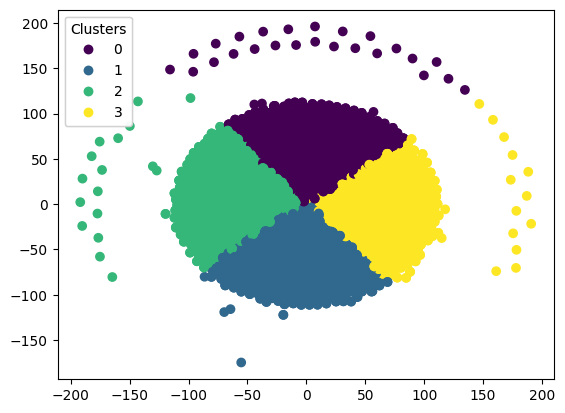

In [ ]:
# plotting the clusters
# training data

import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_data = np.load('train_features_tsne.npy')
train_clusters = np.load('train_clustersK.npy')

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

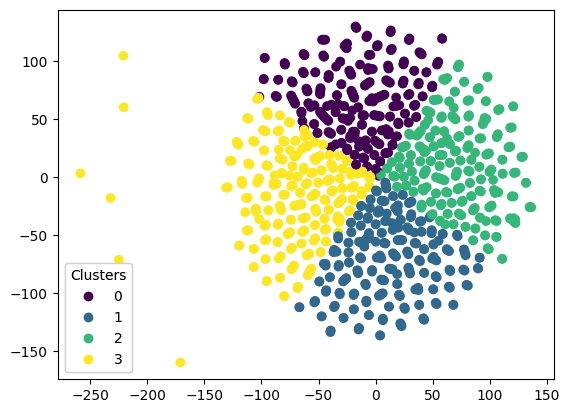

In [ ]:
# testing data

import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_data = np.load('test_features_tsne.npy')
train_clusters = np.load('valid_clustersK.npy')

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 4))

    # We create a scatter plot.
    f = plt.figure(figsize=(10, 10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=100,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(4):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=64)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
# Importing all necessary libraries.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances

#from sklearn.utils.extmath import _ravel
# Random state.
RS = 25111993

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

[0, 1, 2, 3]


<ipython-input-28-81c6645387f9>:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



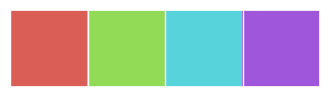

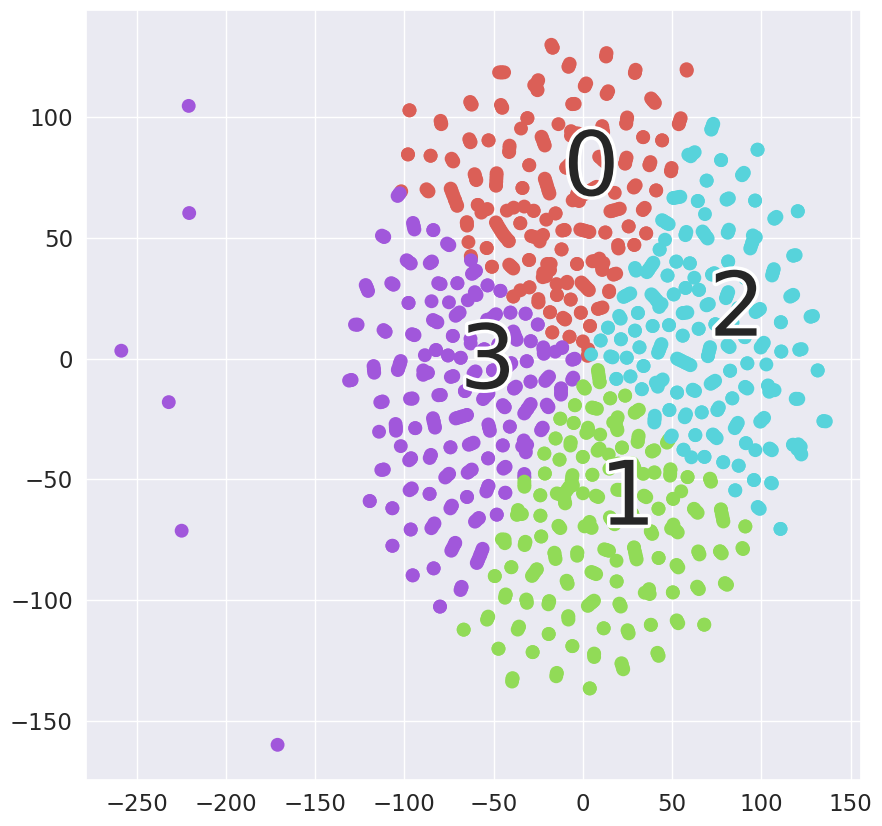

In [ ]:
# another represetation

print(list(range(0,4)))
sns.palplot(np.array(sns.color_palette("hls", 4)))
scatter(train_data,train_clusters)
plt.savefig('tsne-generated_18_clust_48_100.png', dpi=120)

In [ ]:
# saving the clusters and tsne features

! cp /content/test_features_tsne.npy /content/drive/MyDrive/thermal_images/test_features_tsne.npy
! cp /content/train_clustersK.npy /content/drive/MyDrive/thermal_images/train_clustersK.npy
! cp /content/train_features_tsne.npy /content/drive/MyDrive/thermal_images/train_features_tsne.npy
! cp /content/valid_clustersK.npy /content/drive/MyDrive/thermal_images/valid_clusterK.npy

**Tsne for ssae with focal loss and clustering**

In [ ]:
# for loading encoded features from encoder model

encoded_train = np.load("/content/drive/MyDrive/thermal_images/focal_loss/encoded_train_images.npy")
encoded_val = np.load("/content/drive/MyDrive/thermal_images/focal_loss/encoded_val_images.npy")

In [ ]:
# for loading predicted images from autoencoder model of focal loss
encoded_train = np.load("/content/drive/MyDrive/thermal_images/focal_loss/focal_predicted_train.npy")
encoded_val = np.load("/content/drive/MyDrive/thermal_images/focal_loss/focal_predicted_val.npy")

In [ ]:
# Use t-SNE to reduce the dimensionality of the encoded test data
encoded_train_data = encoded_train
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_train_data = tsne.fit_transform(encoded_train_data.reshape(encoded_train_data.shape[0], -1))

In [ ]:
# Use t-SNE to reduce the dimensionality of the encoded test data
encoded_test_data = encoded_val
tsne = TSNE(n_components=2, perplexity=1, learning_rate=1000,n_iter = 1000,metric = 'euclidean',init='random')
tsne_test_data = tsne.fit_transform(encoded_test_data.reshape(encoded_test_data.shape[0], -1))

In [ ]:
np.save("train_focal_features_tsne.npy", tsne_train_data)
np.save("test_focal_features_tsne.npy", tsne_test_data)

In [ ]:
# clustering

import numpy as np
from sklearn.cluster import KMeans

# Load the train and valid data
train_data = np.load('train_focal_features_tsne.npy')
valid_data = np.load( 'test_focal_features_tsne.npy')

# Define the number of clusters
n_clusters = 4

# Cluster the train and valid data using KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_clusters = kmeans.fit_predict(train_data)
valid_clusters = kmeans.predict(valid_data)

# Save the cluster labels for the train and valid data
np.save('train_focal_clustersK.npy', train_clusters)
np.save('valid_focal_clustersK.npy', valid_clusters)

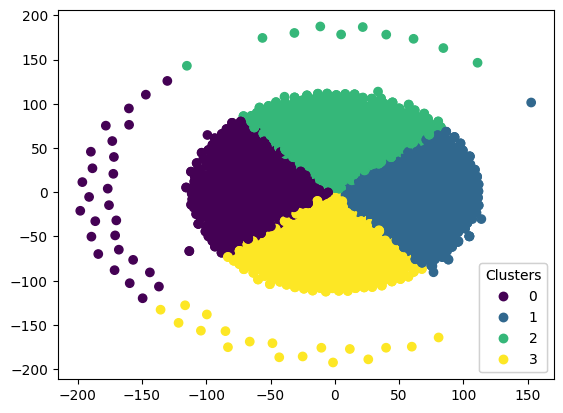

In [ ]:
# plotting the clusters

import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_data = np.load('train_focal_features_tsne.npy')
train_clusters = np.load('train_focal_clustersK.npy')

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

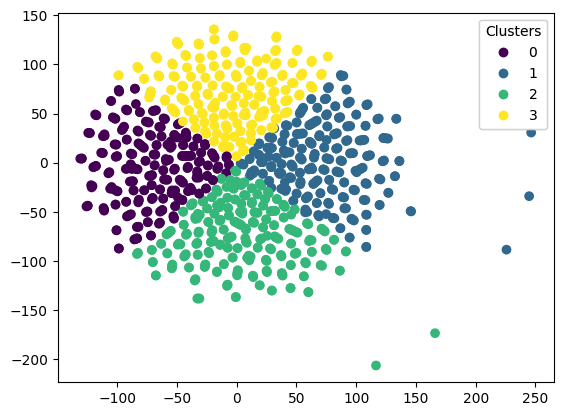

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_data = np.load('test_focal_features_tsne.npy')
train_clusters = np.load('valid_focal_clustersK.npy')

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

It can be noted that similar kind of clusters are obtained on both focal and mse loss

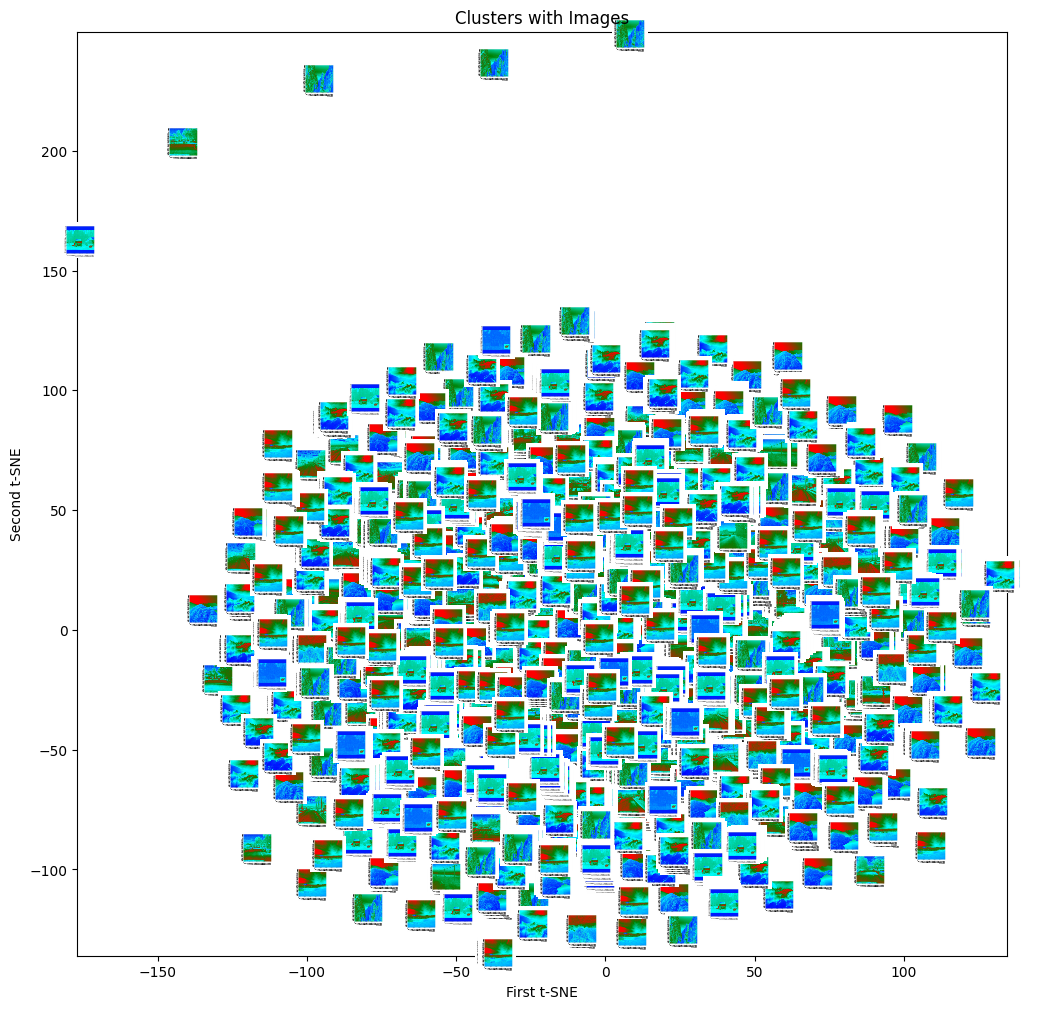

In [ ]:
# plotting tsne with image embeddings

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the train data, cluster labels, and train images
train_data = np.load('/content/test_focal_features_tsne.npy')
train_clusters = np.load('/content/valid_focal_clustersK.npy')
train_images = np.load('/content/drive/MyDrive/thermal_images/val_images.npy')

# Get unique cluster labels
unique_clusters = np.unique(train_clusters)

# Create a new figure with increased size
plt.figure(figsize=(12, 12))

# Iterate over each cluster
for cluster in unique_clusters:
    # Get indices of data points in the cluster
    cluster_indices = np.where(train_clusters == cluster)[0]

    # Get the corresponding images in the cluster
    cluster_images = train_images[cluster_indices]

    # Iterate over each image in the cluster and display it on the scatter plot
    for image, data_point in zip(cluster_images, train_data[cluster_indices]):
        # Reshape the image if needed
        if image.ndim == 1:
            image = image.reshape((64, 64))  # Adjust the image shape as needed

        # Create an OffsetImage object with the image
        img_offset = OffsetImage(image, zoom=0.2)  # Adjust the zoom level as needed

        # Create an AnnotationBbox to place the image at the corresponding t-SNE coordinates
        img_annotation = AnnotationBbox(img_offset, data_point, frameon=False)

        # Add the AnnotationBbox to the current axes
        plt.gca().add_artist(img_annotation)

# Set the title
plt.title('Clusters with Images')

# Set the x and y axis labels
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')

# Set the x and y axis limits
plt.xlim(train_data[:, 0].min() - 1, train_data[:, 0].max() + 1)
plt.ylim(train_data[:, 1].min() - 1, train_data[:, 1].max() + 1)

# Show the plot
plt.show()

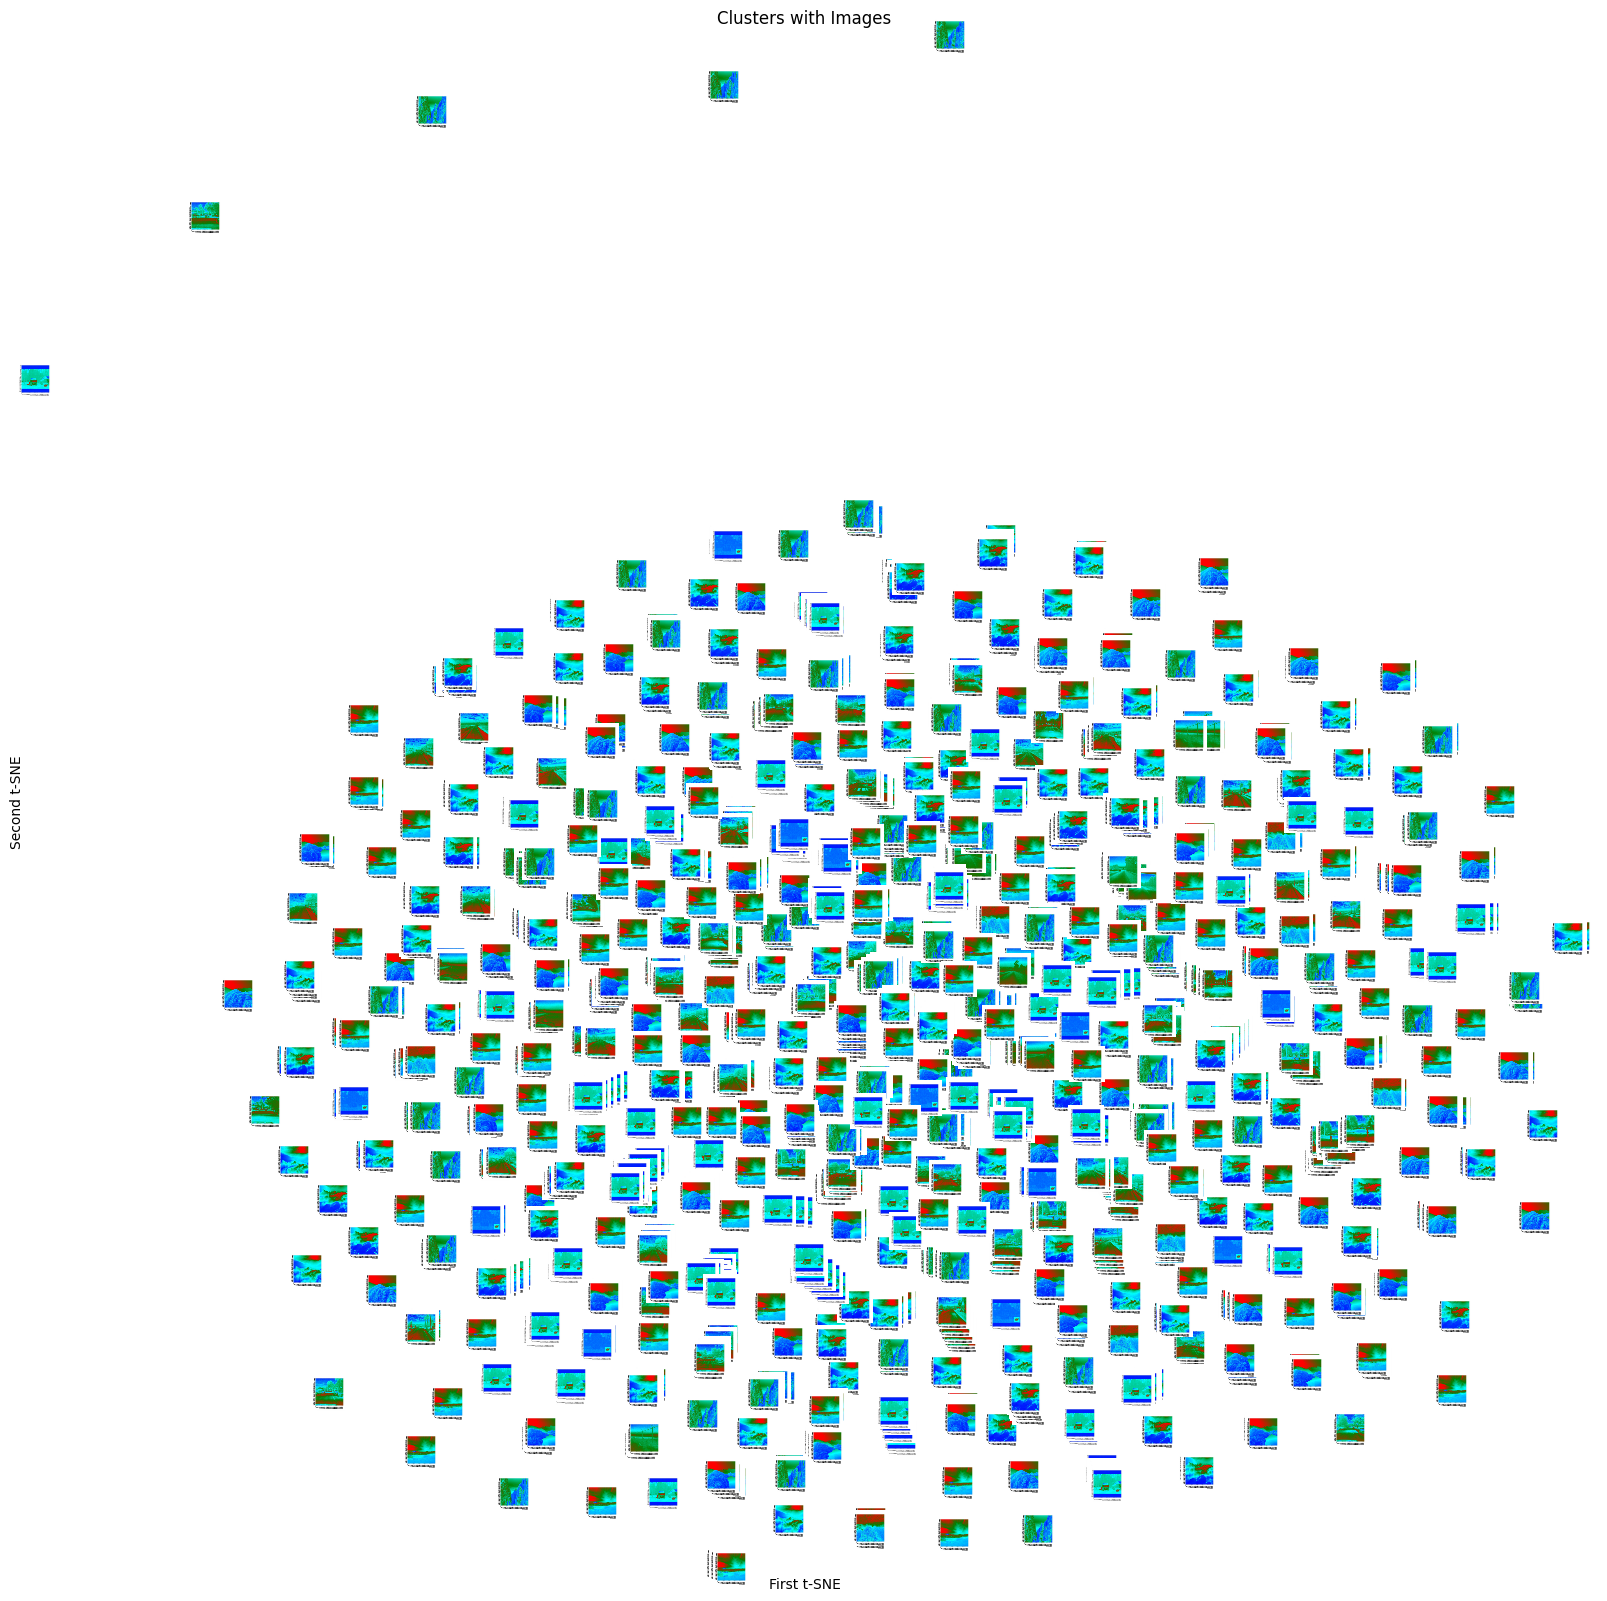

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the train data, cluster labels, and train images
train_data = np.load('/content/test_focal_features_tsne.npy')
train_clusters = np.load('/content/valid_focal_clustersK.npy')
train_images = np.load('/content/drive/MyDrive/thermal_images/val_images.npy')

# Get unique cluster labels
unique_clusters = np.unique(train_clusters)

# Create a new figure with increased size
plt.figure(figsize=(20, 20))

# Iterate over each cluster
for cluster in unique_clusters:
    # Get indices of data points in the cluster
    cluster_indices = np.where(train_clusters == cluster)[0]

    # Get the corresponding images in the cluster
    cluster_images = train_images[cluster_indices]

    # Iterate over each image in the cluster and display it on the scatter plot
    for image, data_point in zip(cluster_images, train_data[cluster_indices]):
        # Reshape the image if needed
        if image.ndim == 1:
            image = image.reshape((64, 64, 3))  # Adjust the image shape as needed

        # Create an OffsetImage object with the image
        img_offset = OffsetImage(image, zoom=0.2)  # Adjust the zoom level as needed

        # Create an AnnotationBbox to place the image at the corresponding t-SNE coordinates
        img_annotation = AnnotationBbox(img_offset, data_point, frameon=False)

        # Add the AnnotationBbox to the current axes
        plt.gca().add_artist(img_annotation)

# Set the title
plt.title('Clusters with Images')

# Set the x and y axis labels
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')

# Set the x and y axis limits
plt.xlim(train_data[:, 0].min() - 1, train_data[:, 0].max() + 1)
plt.ylim(train_data[:, 1].min() - 1, train_data[:, 1].max() + 1)

# Remove ticks from the axes
plt.xticks([])
plt.yticks([])

# Hide the frame of the plot
plt.box(False)

# Save the scatter plot as a PNG image
plt.savefig('scatter_plot.png', dpi=300)  # Adjust the filename and dpi as needed

# Show the plot
plt.show()

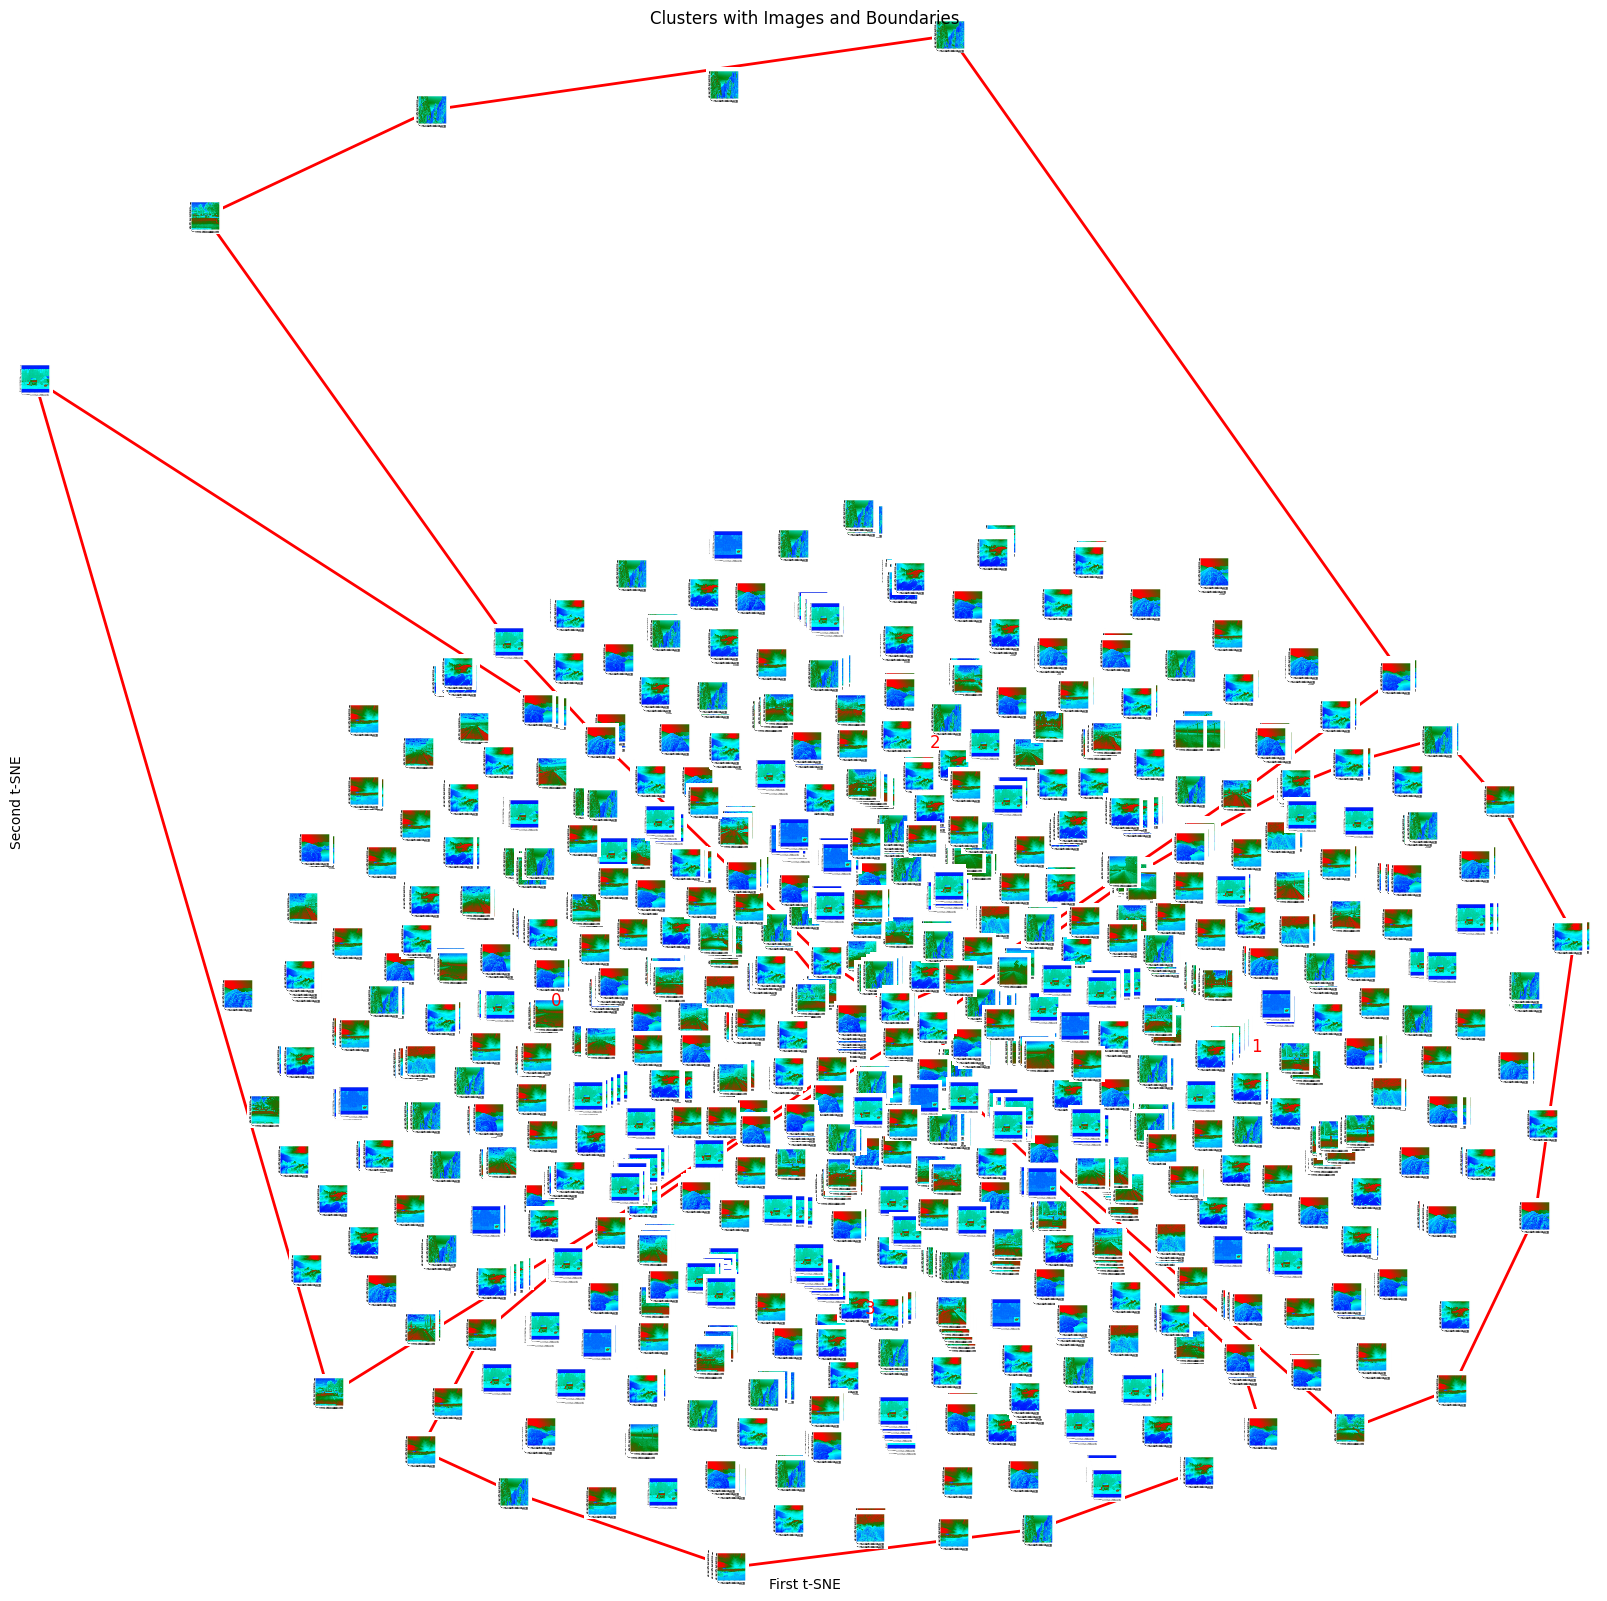

In [ ]:
# clustering graph with image embeddings for validation or testing data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.spatial import ConvexHull

# Load the train data, cluster labels, and train images
train_data = np.load('/content/test_focal_features_tsne.npy')
train_clusters = np.load('/content/valid_focal_clustersK.npy')
train_images = np.load('/content/drive/MyDrive/thermal_images/val_images.npy')

# Get unique cluster labels
unique_clusters = np.unique(train_clusters)

# Create a new figure with increased size
plt.figure(figsize=(20, 20))

# Iterate over each cluster
for cluster in unique_clusters:
    # Get indices of data points in the cluster
    cluster_indices = np.where(train_clusters == cluster)[0]

    # Get the corresponding images in the cluster
    cluster_images = train_images[cluster_indices]

    # Compute the convex hull of the data points in the cluster
    hull = ConvexHull(train_data[cluster_indices])

    # Iterate over each image in the cluster and display it on the scatter plot
    for image, data_point in zip(cluster_images, train_data[cluster_indices]):
        # Reshape the image if needed
        if image.ndim == 1:
            image = image.reshape((64, 64, 3))  # Adjust the image shape as needed

        # Create an OffsetImage object with the image
        img_offset = OffsetImage(image, zoom=0.2)  # Adjust the zoom level as needed

        # Create an AnnotationBbox to place the image at the corresponding t-SNE coordinates
        img_annotation = AnnotationBbox(img_offset, data_point, frameon=False)

        # Add the AnnotationBbox to the current axes
        plt.gca().add_artist(img_annotation)

    # Plot the convex hull to show the cluster boundary
    plt.plot(train_data[cluster_indices, 0][hull.vertices], train_data[cluster_indices, 1][hull.vertices], linewidth=2, color='red')

    # Compute the centroid of the cluster
    cluster_center = np.mean(train_data[cluster_indices], axis=0)

    # Add text label with cluster number
    plt.text(cluster_center[0], cluster_center[1], str(cluster), fontsize=12, color='red')

# Set the title
plt.title('Clusters with Images and Boundaries')

# Set the x and y axis labels
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')

# Set the x and y axis limits
plt.xlim(train_data[:, 0].min() - 1, train_data[:, 0].max() + 1)
plt.ylim(train_data[:, 1].min() - 1, train_data[:, 1].max() + 1)

# Remove ticks from the axes
plt.xticks([])
plt.yticks([])

# Hide the frame of the plot
plt.box(False)

# Save the scatter plot as a PNG image
plt.savefig('scatter_plot.png', dpi=300)  # Adjust the filename and dpi as needed

# Show the plot
plt.show()


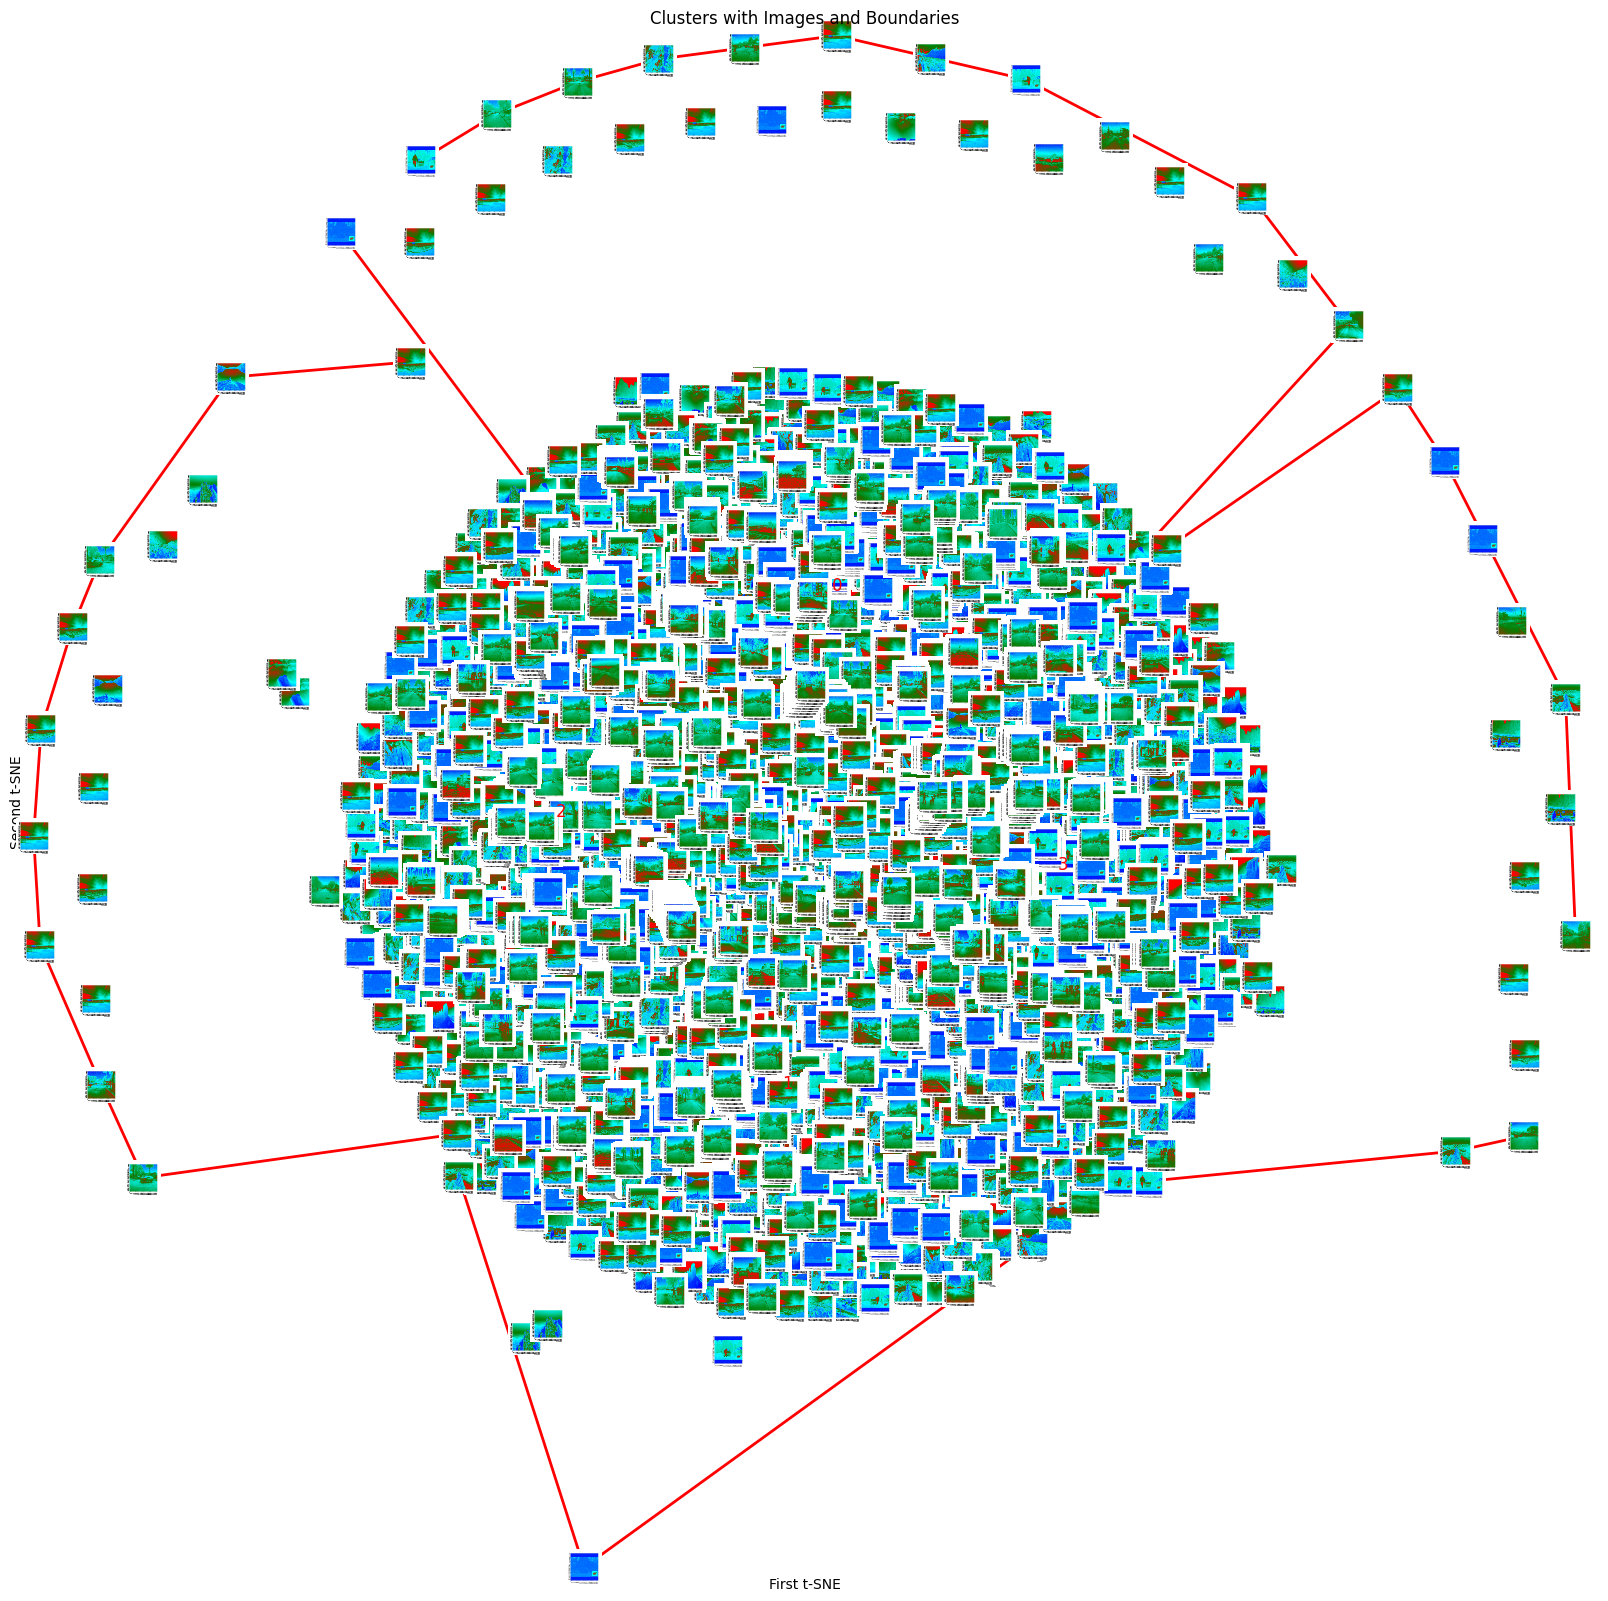

In [ ]:
# image embeddings for training data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.spatial import ConvexHull

# Load the train data, cluster labels, and train images
train_data = np.load('/content/train_features_tsne.npy')
train_clusters = np.load('/content/train_clustersK.npy')
train_images = np.load('/content/drive/MyDrive/thermal_images/train_images.npy')

# Get unique cluster labels
unique_clusters = np.unique(train_clusters)

# Create a new figure with increased size
plt.figure(figsize=(20, 20))

# Iterate over each cluster
for cluster in unique_clusters:
    # Get indices of data points in the cluster
    cluster_indices = np.where(train_clusters == cluster)[0]

    # Get the corresponding images in the cluster
    cluster_images = train_images[cluster_indices]

    # Compute the convex hull of the data points in the cluster
    hull = ConvexHull(train_data[cluster_indices])

    # Iterate over each image in the cluster and display it on the scatter plot
    for image, data_point in zip(cluster_images, train_data[cluster_indices]):
        # Reshape the image if needed
        if image.ndim == 1:
            image = image.reshape((64, 64, 3))  # Adjust the image shape as needed

        # Create an OffsetImage object with the image
        img_offset = OffsetImage(image, zoom=0.2)  # Adjust the zoom level as needed

        # Create an AnnotationBbox to place the image at the corresponding t-SNE coordinates
        img_annotation = AnnotationBbox(img_offset, data_point, frameon=False)

        # Add the AnnotationBbox to the current axes
        plt.gca().add_artist(img_annotation)

    # Plot the convex hull to show the cluster boundary
    plt.plot(train_data[cluster_indices, 0][hull.vertices], train_data[cluster_indices, 1][hull.vertices], linewidth=2, color='red')

    # Compute the centroid of the cluster
    cluster_center = np.mean(train_data[cluster_indices], axis=0)

    # Add text label with cluster number
    plt.text(cluster_center[0], cluster_center[1], str(cluster), fontsize=12, color='red')

# Set the title
plt.title('Clusters with Images and Boundaries')

# Set the x and y axis labels
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')

# Set the x and y axis limits
plt.xlim(train_data[:, 0].min() - 1, train_data[:, 0].max() + 1)
plt.ylim(train_data[:, 1].min() - 1, train_data[:, 1].max() + 1)

# Remove ticks from the axes
plt.xticks([])
plt.yticks([])

# Hide the frame of the plot
plt.box(False)

# Save the scatter plot as a PNG image
plt.savefig('scatter_plot.png', dpi=300)  # Adjust the filename and dpi as needed

# Show the plot
plt.show()


**checking metrics for clusters from focal loss**

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

# Load the train data and cluster labels
train_data = np.load('train_features_tsne.npy')
train_clusters = np.load('train_clustersK.npy')

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_data, train_clusters)
print("The silhouette score is:", silhouette_avg)


The silhouette score is: 0.34380803


In [ ]:
# Load the train data and cluster labels
train_data = np.load('train_features_tsne.npy')
train_clusters = np.load('train_clustersK.npy')
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(train_data, train_clusters)
print("Calinski-Harabasz Index:", score)

Calinski-Harabasz Index: 3745.506621676593


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming you have the following variables:
tsne_features= train_data
cluster_labels= train_clusters

# Calculate the cluster centroids
centroids = []
for i in range(np.max(cluster_labels) + 1):
    centroid = np.mean(tsne_features[cluster_labels == i], axis=0)
    centroids.append(centroid)

# Compute the pairwise distances between cluster centroids
centroid_distances = pairwise_distances(centroids)

# Calculate the within-cluster scatter and between-cluster separation
scatter = np.zeros(len(centroids))
for i in range(len(centroids)):
    scatter[i] = np.mean(pairwise_distances(tsne_features[cluster_labels == i], [centroids[i]]))

# Compute the DBI
dbi = 0.0
for i in range(len(centroids)):
    max_db = 0.0
    for j in range(len(centroids)):
        if i != j:
            db = (scatter[i] + scatter[j]) / centroid_distances[i, j]
            if db > max_db:
                max_db = db
    dbi += max_db

dbi /= len(centroids)
print("Davies-Bouldin Index:", dbi)


Davies-Bouldin Index: 0.8614734973885902


**DBSCAN clustering**

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load the t-SNE features
tsne_features = train_data

# Compute the distance to the kth nearest neighbor
k = 75  # Adjust the value of k as needed
nbrs = NearestNeighbors(n_neighbors=k+1).fit(tsne_features)
distances, _ = nbrs.kneighbors(tsne_features)
k_distances = np.mean(distances[:, 1:], axis=1)

# Sort the distances in descending order
sorted_distances = np.sort(k_distances)[::-1]

# Compute the second derivative
second_derivative = np.diff(np.diff(sorted_distances))

# Find the index of the maximum curvature point
max_curvature_index = np.argmax(second_derivative) + 1

# Print the index and value of the maximum curvature point
print("Maximum curvature point:")
print("Index:", max_curvature_index)
print("Value:", sorted_distances[max_curvature_index])

# Based on the plot and the maximum curvature point, select an appropriate epsilon value
eps = sorted_distances[max_curvature_index]  # Adjust the value of eps as needed

# Define the minimum number of samples required for a cluster
min_samples = 5  # Adjust the value of min_samples as needed

# Create an instance of DBSCAN with the selected epsilon and min_samples values
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the t-SNE features
dbscan.fit(tsne_features)

# Retrieve the cluster labels and noise points
cluster_labels = dbscan.labels_
noise_points = cluster_labels == -1

# Check the number of clusters found
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)


Maximum curvature point:
Index: 54
Value: 21.63487522442984
Number of clusters: 4


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

# Load the train data and cluster labels
train_data = train_data
train_clusters = cluster_labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_data, train_clusters)
print("The silhouette score is:", silhouette_avg)


The silhouette score is: 0.4044793


In [ ]:
# Load the train data and cluster labels
train_data = train_data
train_clusters = cluster_labels
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(train_data, train_clusters)
print("Calinski-Harabasz Index:", score)


Calinski-Harabasz Index: 29.95817679035354


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming you have the following variables:
tsne_features= train_data
cluster_labels= cluster_labels

# Calculate the cluster centroids
centroids = []
for i in range(np.max(cluster_labels) + 1):
    centroid = np.mean(tsne_features[cluster_labels == i], axis=0)
    centroids.append(centroid)

# Compute the pairwise distances between cluster centroids
centroid_distances = pairwise_distances(centroids)

# Calculate the within-cluster scatter and between-cluster separation
scatter = np.zeros(len(centroids))
for i in range(len(centroids)):
    scatter[i] = np.mean(pairwise_distances(tsne_features[cluster_labels == i], [centroids[i]]))

# Compute the DBI
dbi = 0.0
for i in range(len(centroids)):
    max_db = 0.0
    for j in range(len(centroids)):
        if i != j:
            db = (scatter[i] + scatter[j]) / centroid_distances[i, j]
            if db > max_db:
                max_db = db
    dbi += max_db

dbi /= len(centroids)
print("Davies-Bouldin Index:", dbi)



Davies-Bouldin Index: 0.6222447728845493


In [ ]:
np.save("cluster_labels_k50_minsample4_DBSCAN.npy", cluster_labels)

In [ ]:
! cp /content/cluster_labels_k50_minsample4_DBSCAN.npy /content/drive/MyDrive/thermal_images/DBSCAN/cluster_labels_k50_minsample4_DBSCAN.npy

GMM clustering

In [ ]:
from sklearn.mixture import GaussianMixture
train_data = np.load('train_features_tsne.npy')
# Load the t-SNE features
tsne_features = train_data

# Specify the number of clusters
n_clusters = 4

# Fit the GMM
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(tsne_features)


GaussianMixture(n_components=4)

In [ ]:
# Assign clusters to t-SNE data points
cluster_labels = gmm.predict(tsne_features)


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

# Load the train data and cluster labels
train_data = train_data
train_clusters = cluster_labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_data, train_clusters)
print("The silhouette score is:", silhouette_avg)
#0.41

The silhouette score is: 0.34131292


In [ ]:
# Load the train data and cluster labels
train_data = train_data
train_clusters = cluster_labels
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(train_data, train_clusters)
print("Calinski-Harabasz Index:", score)
#22.19

Calinski-Harabasz Index: 3686.9995453814367


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the t-SNE features
tsne_features = train_data

# Define the desired number of clusters
n_clusters = 4

# Define a range of covariance types to try
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_score = -1
best_gmm = None

# Iterate over different covariance types
for covariance_type in covariance_types:
    # Create an instance of GMM with the desired number of clusters and covariance type
    gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type)

    # Fit the GMM to the t-SNE features
    gmm.fit(tsne_features)

    # Predict the cluster labels
    cluster_labels = gmm.predict(tsne_features)

    # Compute the silhouette score
    score = silhouette_score(tsne_features, cluster_labels)

    # Check if the current score is better than the best score so far
    if score > best_score:
        best_score = score
        best_gmm = gmm

# Print the best silhouette score and the corresponding GMM model
print("Best Silhouette Score:", best_score)
print("Best GMM Model:", best_gmm)


Best Silhouette Score: 0.34328252
Best GMM Model: GaussianMixture(covariance_type='spherical', n_components=4)


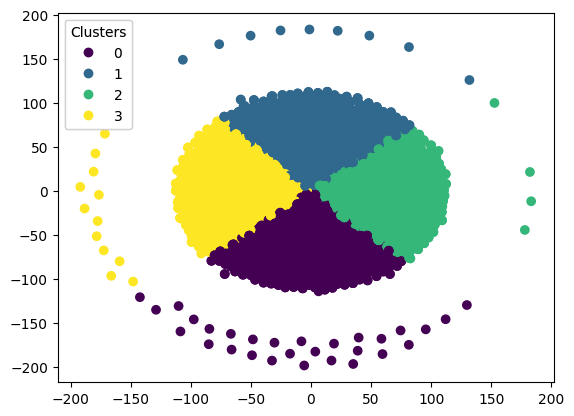

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the train data and cluster labels
train_clusters = cluster_labels

# Plot the clusters
fig, ax = plt.subplots()
scatter = ax.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming you have the following variables:
tsne_features= train_data
cluster_labels= cluster_labels

# Calculate the cluster centroids
centroids = []
for i in range(np.max(cluster_labels) + 1):
    centroid = np.mean(tsne_features[cluster_labels == i], axis=0)
    centroids.append(centroid)

# Compute the pairwise distances between cluster centroids
centroid_distances = pairwise_distances(centroids)

# Calculate the within-cluster scatter and between-cluster separation
scatter = np.zeros(len(centroids))
for i in range(len(centroids)):
    scatter[i] = np.mean(pairwise_distances(tsne_features[cluster_labels == i], [centroids[i]]))

# Compute the DBI
dbi = 0.0
for i in range(len(centroids)):
    max_db = 0.0
    for j in range(len(centroids)):
        if i != j:
            db = (scatter[i] + scatter[j]) / centroid_distances[i, j]
            if db > max_db:
                max_db = db
    dbi += max_db

dbi /= len(centroids)
print("Davies-Bouldin Index:", dbi)
#0.66


Davies-Bouldin Index: 0.86226191137605


In [ ]:
# Load the train data and cluster labels
train_data = train_data
train_clusters = cluster_labels
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(train_data, train_clusters)
print("Calinski-Harabasz Index:", score)
#22.19

Calinski-Harabasz Index: 3733.5395106708615
